In [ ]:
# Importing the necessary packages

import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams

In [ ]:
df = pd.read_csv('AirPassenger.csv',parse_dates=True,index_col='Year-Month')
df.head()

,Pax
Year-Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
rcParams['figure.figsize'] = 15,8

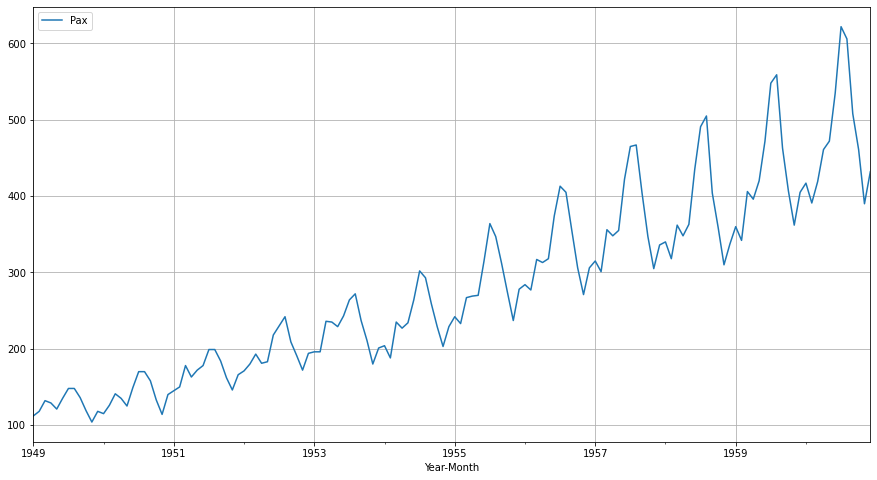

In [ ]:
df.plot(grid=True);

In [ ]:
train             = df[df.index<'1957']
test              = df[df.index>'1957']

In [ ]:
# Printing the AirPassengers Data
print('Training Data')
display(train)
print('Test Data')
display(test)

Training Data


,Pax
Year-Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1956-08-01,405
1956-09-01,355
1956-10-01,306


Test Data


,Pax
Year-Month,
1957-02-01,301
1957-03-01,356
1957-04-01,348
1957-05-01,355
1957-06-01,422
1957-07-01,465
1957-08-01,467
1957-09-01,404
1957-10-01,347


In [ ]:
# create class

model_SES = SimpleExpSmoothing(train)

/Users/divyasarika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [ ]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

In [ ]:
## Let us check the parameters

model_SES_autofit.params

{'smoothing_level': 1.0,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 112.00127566912177,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

Here, Python has optimized the smoothing level to be almost 1.

In [ ]:
# Using the fitted model on the training set to forecast on the test set
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

1957-01-01    306.0
1957-02-01    306.0
1957-03-01    306.0
1957-04-01    306.0
1957-05-01    306.0
1957-06-01    306.0
1957-07-01    306.0
1957-08-01    306.0
1957-09-01    306.0
1957-10-01    306.0
1957-11-01    306.0
1957-12-01    306.0
1958-01-01    306.0
1958-02-01    306.0
1958-03-01    306.0
1958-04-01    306.0
1958-05-01    306.0
1958-06-01    306.0
1958-07-01    306.0
1958-08-01    306.0
1958-09-01    306.0
1958-10-01    306.0
1958-11-01    306.0
1958-12-01    306.0
1959-01-01    306.0
1959-02-01    306.0
1959-03-01    306.0
1959-04-01    306.0
1959-05-01    306.0
1959-06-01    306.0
1959-07-01    306.0
1959-08-01    306.0
1959-09-01    306.0
1959-10-01    306.0
1959-11-01    306.0
1959-12-01    306.0
1960-01-01    306.0
1960-02-01    306.0
1960-03-01    306.0
1960-04-01    306.0
1960-05-01    306.0
1960-06-01    306.0
1960-07-01    306.0
1960-08-01    306.0
1960-09-01    306.0
1960-10-01    306.0
1960-11-01    306.0
Freq: MS, dtype: float64

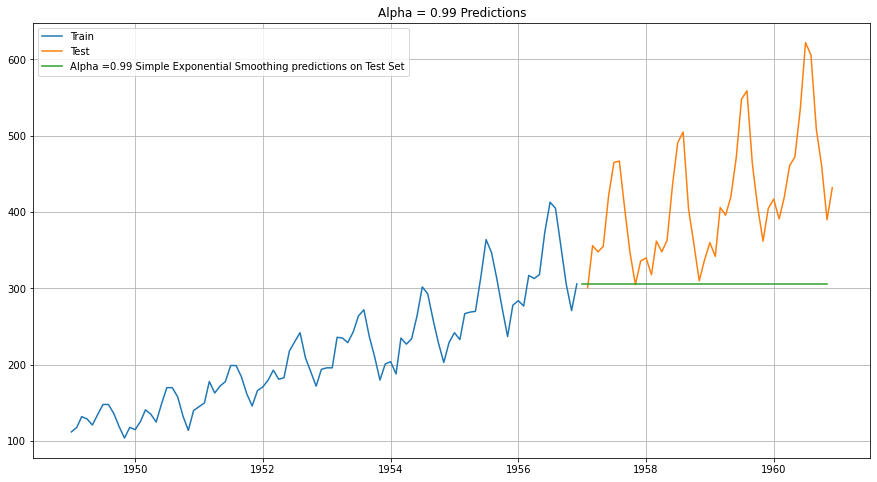

In [ ]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.99 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.99 Predictions');

In [ ]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [ ]:
print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(test.values,SES_predict.values)[0])

SES RMSE: 134.00682739037606
SES RMSE (calculated using statsmodels): 134.00682739037606


In [ ]:
resultsDf = pd.DataFrame({'Test RMSE': [em.rmse(test.values,SES_predict.values)[0]]},index=['Alpha=0.99,SES'])
resultsDf

,Test RMSE
"Alpha=0.99,SES",134.006827


In [ ]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train)
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 1.0, 'smoothing_slope': 0.0, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 109.95767226462243, 'initial_slope': 2.0421274999083505, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/Users/divyasarika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [ ]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict

1957-01-01    308.042127
1957-02-01    310.084255
1957-03-01    312.126382
1957-04-01    314.168510
1957-05-01    316.210637
1957-06-01    318.252765
1957-07-01    320.294892
1957-08-01    322.337020
1957-09-01    324.379147
1957-10-01    326.421275
1957-11-01    328.463402
1957-12-01    330.505530
1958-01-01    332.547657
1958-02-01    334.589785
1958-03-01    336.631912
1958-04-01    338.674040
1958-05-01    340.716167
1958-06-01    342.758295
1958-07-01    344.800422
1958-08-01    346.842550
1958-09-01    348.884677
1958-10-01    350.926805
1958-11-01    352.968932
1958-12-01    355.011060
1959-01-01    357.053187
1959-02-01    359.095315
1959-03-01    361.137442
1959-04-01    363.179570
1959-05-01    365.221697
1959-06-01    367.263825
1959-07-01    369.305952
1959-08-01    371.348080
1959-09-01    373.390207
1959-10-01    375.432335
1959-11-01    377.474462
1959-12-01    379.516590
1960-01-01    381.558717
1960-02-01    383.600845
1960-03-01    385.642972
1960-04-01    387.685100


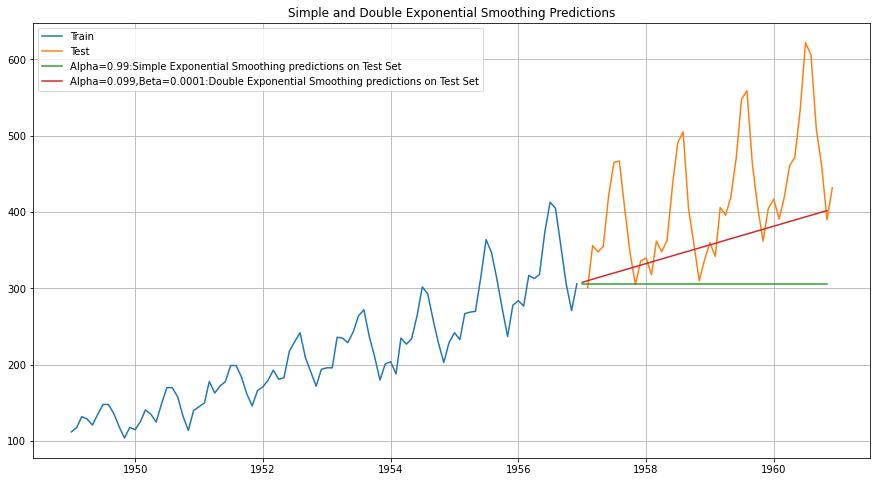

In [ ]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.99:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.099,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

We see that the double exponential smoothing is picking up the trend component along with the level component as well.

In [ ]:
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 89.95288103271118


In [ ]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha=1,Beta=0.0189:DES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.99,SES",134.006827
"Alpha=1,Beta=0.0189:DES",89.952881


### Inference

Here, we see that the Double Exponential Smoothing has actually done well when compared to the Simple Exponential Smoothing. This is because of the fact that the Double Exponential Smoothing model has picked up the trend component as well.

The Holt's model in Python has certain other options of exponential trends or whether the smoothing parameters should be damped. You can try these out later to check whether you get a better forecast.

#### Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors

In [ ]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.26315789342092966, 'smoothing_slope': 0.051714049121836185, 'smoothing_seasonal': 0.7368421039472455, 'damping_slope': nan, 'initial_level': 182.83012461773998, 'initial_slope': 1.7013563658159943, 'initial_seasons': array([-71.41896048, -65.44064101, -51.52127793, -54.63708172,
       -62.67525173, -48.66769193, -35.69840361, -35.8024745 ,
       -47.88463656, -64.94283201, -79.88194134, -65.72380701]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/Users/divyasarika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/divyasarika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


In [ ]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))
TES_predict

1957-01-01    320.924021
1957-02-01    313.638039
1957-03-01    352.925020
1957-04-01    350.350301
1957-05-01    356.060922
1957-06-01    408.899129
1957-07-01    446.143114
1957-08-01    433.358026
1957-09-01    382.762459
1957-10-01    336.170254
1957-11-01    303.315050
1957-12-01    349.662472
1958-01-01    356.109876
1958-02-01    348.823895
1958-03-01    388.110875
1958-04-01    385.536156
1958-05-01    391.246778
1958-06-01    444.084984
1958-07-01    481.328969
1958-08-01    468.543881
1958-09-01    417.948315
1958-10-01    371.356110
1958-11-01    338.500906
1958-12-01    384.848327
1959-01-01    391.295732
1959-02-01    384.009751
1959-03-01    423.296731
1959-04-01    420.722012
1959-05-01    426.432633
1959-06-01    479.270840
1959-07-01    516.514825
1959-08-01    503.729737
1959-09-01    453.134171
1959-10-01    406.541965
1959-11-01    373.686761
1959-12-01    420.034183
1960-01-01    426.481588
1960-02-01    419.195606
1960-03-01    458.482586
1960-04-01    455.907867


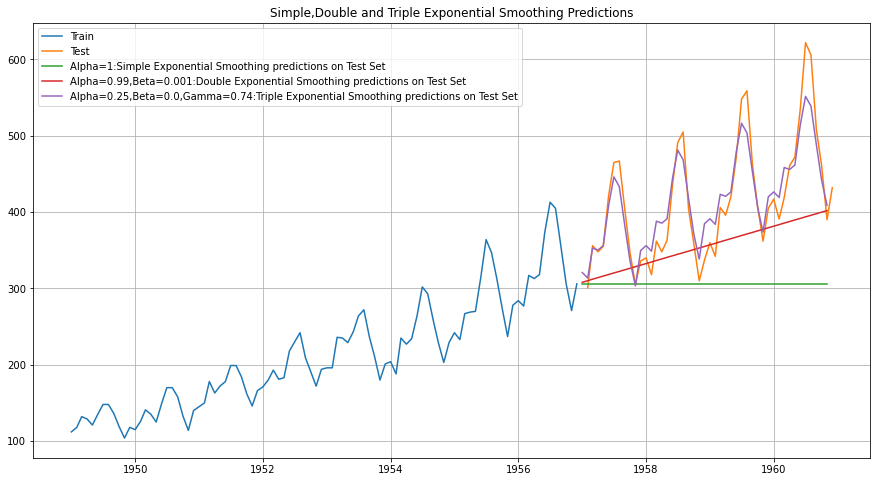

In [ ]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

We see that the Triple Exponential Smoothing is picking up the seasonal component as well.

In [ ]:
print('TES RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))

TES RMSE: 41.32035832517067


In [ ]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['Alpha=0.25,Beta=0.0,Gamma=0.74:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.99,SES",134.006827
"Alpha=1,Beta=0.0189:DES",89.952881
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",41.320358


### Inference

Triple Exponential Smoothing has performed the best on the test as expected since the data had both trend and seasonality.

But we see that our triple exponential smoothing is under forecasting. Let us try to tweak some of the parameters in order to get a better forecast on the test set.

#### Holt-Winters - ETS(A, A, M) - Holt Winter's linear method

ETS(A, A, M) model

In [ ]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.7408187448353557, 'smoothing_slope': 1.175854910753783e-10, 'smoothing_seasonal': 0.0, 'damping_slope': nan, 'initial_level': 183.61020540824614, 'initial_slope': 3.3581644788271787, 'initial_seasons': array([0.60539087, 0.59237939, 0.67902768, 0.6561592 , 0.65185231,
       0.73538573, 0.81276782, 0.79541833, 0.69912241, 0.60735251,
       0.52789849, 0.59683969]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/Users/divyasarika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [ ]:
# Forecasting using this model for the duration of the test set
TES_predict_am =  model_TES_am.forecast(len(test))
TES_predict_am

1957-01-01    312.887445
1957-02-01    308.151961
1957-03-01    355.506130
1957-04-01    345.736791
1957-05-01    345.656473
1957-06-01    392.421123
1957-07-01    436.443649
1957-08-01    429.798389
1957-09-01    380.113372
1957-10-01    332.257598
1957-11-01    290.564341
1957-12-01    330.515038
1958-01-01    337.283470
1958-02-01    332.023650
1958-03-01    382.869570
1958-04-01    372.178677
1958-05-01    371.924800
1958-06-01    422.055678
1958-07-01    469.196545
1958-08-01    461.852136
1958-09-01    408.286589
1958-10-01    356.732674
1958-11-01    311.837581
1958-12-01    354.566468
1959-01-01    361.679496
1959-02-01    355.895339
1959-03-01    410.233009
1959-04-01    398.620564
1959-05-01    398.193127
1959-06-01    451.690233
1959-07-01    501.949441
1959-08-01    493.905883
1959-09-01    436.459805
1959-10-01    381.207749
1959-11-01    333.110821
1959-12-01    378.617898
1960-01-01    386.075521
1960-02-01    379.767028
1960-03-01    437.596449
1960-04-01    425.062450


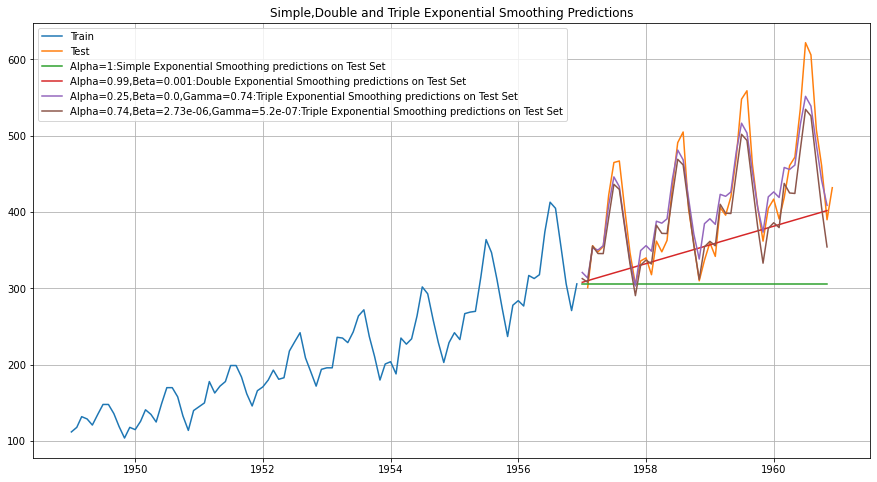

In [ ]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am, label='Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

### Report model accuracy

In [ ]:
print('TES_am RMSE:',mean_squared_error(test.values,TES_predict_am.values,squared=False))

TES_am RMSE: 50.286258382594134


In [ ]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
                           ,index=['Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.99,SES",134.006827
"Alpha=1,Beta=0.0189:DES",89.952881
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",41.320358
"Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES",50.286258


We see that the multiplicative seasonality model has not done that well when compared to the additive seasonality Triple Exponential Smoothing model.
